# Import the dataset and explore the data

In [933]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE

#scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [934]:
#First Hearing Date: blank means no hearing yet, can we input? I think not
#Agreement Reached: Can't input
#WCB Decision: Can't input

#test data don't have Agreement Reached, WCB Decision and Claim Injury Type (this one make sense)

In [935]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')
#what does this warning mean?

C:\Users\lopes\AppData\Local\Temp\ipykernel_21864\3913529062.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv')


In [936]:
pd.set_option('display.max_columns', None) #to display all columns
train_data.head()
#Claim Identifier: should be the first column
#Claim Injury Type: should be the last column
#line 3 just have the claim identifier and assemble date, we should delete it

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [937]:
train_data.shape

(593471, 33)

In [938]:
train_data.info()
#OIICS Nature of Injury Description: no data
#IME-4 Count: Few info, just for who has an attorney? maybe we should delete for modeling purposes
#C-3 Date: very few values 1/5 of the data

#Industry Code, WCIO Cause of Injury Code, WCIO Nature of Injury Code and WCIO Part Of Body Code should be categorical
#Agreement Reached, Age at Injury, Birth Year and Number of Dependents should be int?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [939]:
train_data.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [940]:
train_data.describe(include=['object'])

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [941]:
columns_name = train_data.columns
columns_name

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [942]:
for i in columns_name:
    print(i)
    print(train_data[i].unique())
    print(train_data[i].value_counts())
    print('\n')
#Age at Injury: if it's a workplace it means ages like 5 or 9 don't make sense, we should delete them
#Birth Year: with a lot of 0.0
#Claim Identifier: 292668076 is repeated
#Zip Code: 'G9B0Y' is an error?
#WCB Decision: just 'Not Work Related' and 'nan'? maybe we can delete this column

#maybe 0.0 it's a nan, some values we don't have, but exists
#Carrier Type: we have a lot of UNKNOW, so maybe we can conclude 0.0 or nothing mean missing values

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

In [943]:
train_data.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

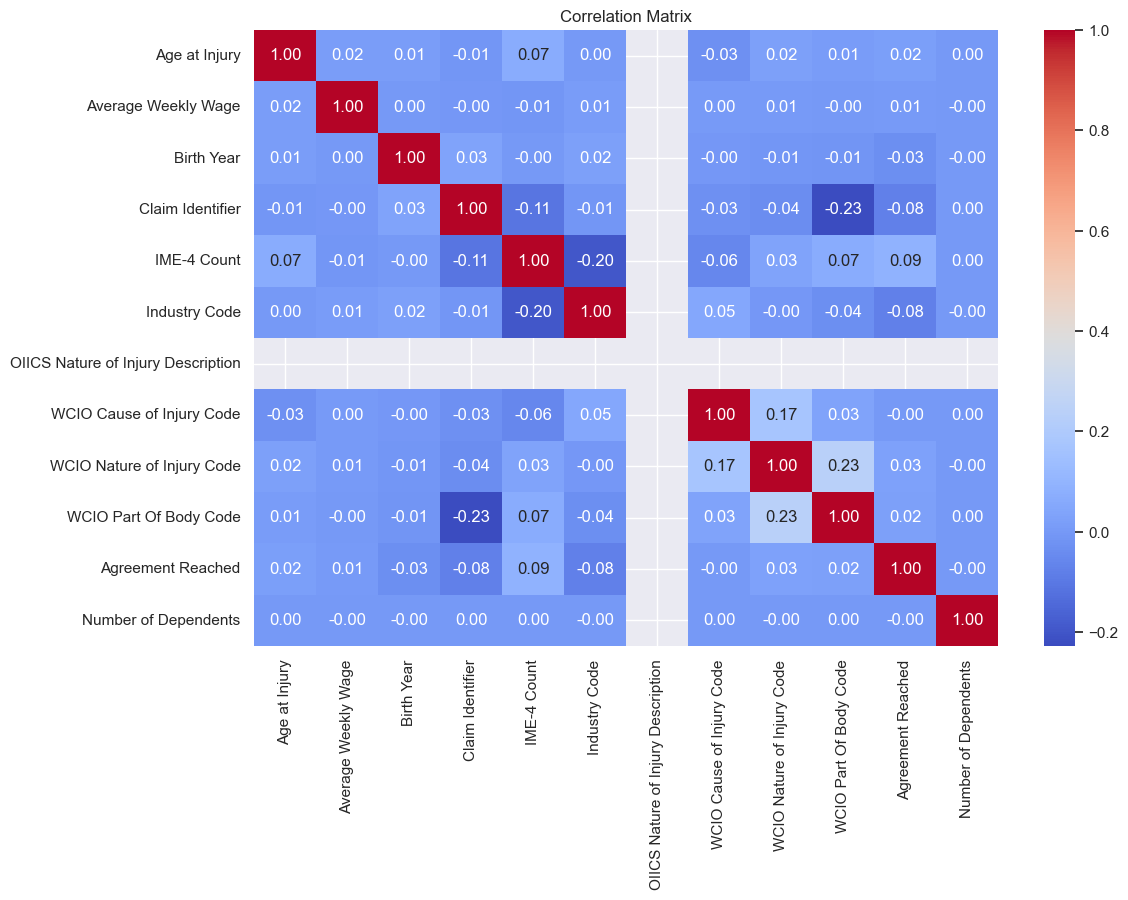

In [944]:
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = train_data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Clean and pre-process the dataset

In [945]:
train_data.shape[0] #number of rows, the same as Claim Identifier

593471

In [946]:
train_data.set_index('Claim Identifier', inplace=True) #set Claim Identifier as index
test_data.set_index('Claim Identifier', inplace=True)

In [947]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [948]:
train_data[train_data.index == 292668076] #to delete, no info and duplicate

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
292668076,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292668076,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [949]:
train_data.drop(292668076, inplace=True) #delete the rows
train_data.drop(['OIICS Nature of Injury Description', 'WCB Decision'], axis=1, inplace=True) #delete the column, just nan values or one value
test_data.drop(['OIICS Nature of Injury Description'], axis=1, inplace=True)
#train_data = train_data[(train_data['Age at Injury'] >= 16) & (train_data['Age at Injury'] <= 70)]
#test_data = test_data[(test_data['Age at Injury'] >= 16) & (test_data['Age at Injury'] <= 70)] #can't work if they are younger than 16
train_data.dropna(subset=['Claim Injury Type'], inplace=True) #delete the rows with missing values in Claim Injury Type
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,5.0


In [950]:
# IN INT
train_data['Age at Injury'] = train_data['Age at Injury'].astype('Int64')
train_data['Birth Year'] = train_data['Birth Year'].astype('Int64')
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype('Int64')
train_data['Number of Dependents'] = train_data['Number of Dependents'].astype('Int64')  

test_data['Age at Injury'] = test_data['Age at Injury'].astype('Int64')
test_data['Birth Year'] = test_data['Birth Year'].astype('Int64')
test_data['Number of Dependents'] = test_data['Number of Dependents'].astype('Int64')

In [951]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].apply(lambda x: abs(x) if x < 0 else x)
test_data['WCIO Part Of Body Code'] = test_data['WCIO Part Of Body Code'].apply(lambda x: abs(x) if x < 0 else x)

In [952]:
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
train_data[float_to_object] = train_data[float_to_object].astype(str)
test_data[float_to_object] = test_data[float_to_object].astype(str)
train_data.dtypes

Accident Date                         object
Age at Injury                          Int64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                             Int64
C-2 Date                              object
C-3 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
First Hearing Date                    object
Gender                                object
IME-4 Count                          float64
Industry Code                         object
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code             object
WCIO Cause

In [953]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,N,2020-01-01,N,0.00,1988,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0,1
5393091,2019-08-30,46,N,2020-01-01,Y,1745.93,1973,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1,4
5393889,2019-12-06,40,N,2020-01-01,N,1434.80,1979,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0,6
5393887,2019-12-30,61,N,2020-01-01,N,NaN,1958,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0,1
5393863,2019-12-26,67,N,2020-01-01,N,0.00,1952,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0,5


In [954]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

1
2


In [955]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [956]:
#classifiy them as Non-US residents
train_data['Zip Code'] = train_data['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)
test_data['Zip Code'] = test_data['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)

In [957]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
train_data['Zip Code'] = np.where(
    (train_data['Zip Code'] != 'Unknown') & 
    (train_data['Zip Code'] != 'Non-US Resident') & 
    train_data['Zip Code'].notna() & 
    train_data['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (train_data['Zip Code'] != 'Unknown') & 
        (train_data['Zip Code'] != 'Non-US Resident') & 
        train_data['Zip Code'].notna(), 
        'non-NY US Residents', 
        train_data['Zip Code']
    )
)
test_data['Zip Code'] = np.where(
    (test_data['Zip Code'] != 'Unknown') & 
    (test_data['Zip Code'] != 'Non-US Resident') & 
    test_data['Zip Code'].notna() & 
    test_data['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (test_data['Zip Code'] != 'Unknown') & 
        (test_data['Zip Code'] != 'Non-US Resident') & 
        test_data['Zip Code'].notna(), 
        'non-NY US Residents', 
        test_data['Zip Code']
    )
)

In [958]:
train_data['Zip Code'].unique()

array(['NY Resident', 'non-NY US Residents', nan, 'Non-US Resident'],
      dtype=object)

### Missing values

In [959]:
train_data = train_data.dropna(thresh=4)
test_data = test_data.dropna(thresh=4)
train_data.isna().sum()

Accident Date                          3688
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14559
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441222
Industry Code                             0
Industry Code Description              9957
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description

In [960]:
test_data.isna().sum()

Accident Date                          2442
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9132
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344945
Gender                                    0
IME-4 Count                          352724
Industry Code                             0
Industry Code Description              7735
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description      10346
WCIO Nature of Injury Code      

Accident Date

In [961]:
train_data['Accident Date'] = train_data['Accident Date'].fillna('2020-03-01')
test_data['Accident Date'] = test_data['Accident Date'].fillna('2020-03-01')

Average Weekly Wage

In [962]:
median_to_fill = train_data['Average Weekly Wage'].median()
train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].fillna(median_to_fill)
test_data['Average Weekly Wage'] = test_data['Average Weekly Wage'].fillna(median_to_fill)

In [963]:
train_data['Average Weekly Wage'].isna().sum()

0

Birth Year (Diogo)

In [964]:
train_data['Accident Year'] = train_data['Accident Date'].map(lambda x: int(x.split('-')[0]) if x != 'Unknown' else 0)
train_data['Birth_Year_2'] = train_data['Accident Year'] - train_data['Age at Injury']
train_data['Birth Year'] = train_data['Birth Year'].fillna(train_data['Birth_Year_2'])

test_data['Accident Year'] = test_data['Accident Date'].map(lambda x: int(x.split('-')[0]) if x != 'Unknown' else 0)
test_data['Birth_Year_2'] = test_data['Accident Year'] - test_data['Age at Injury']
test_data['Birth Year'] = test_data['Birth Year'].fillna(test_data['Birth_Year_2'])

C-2 Date

In [965]:
train_data['C-2 Date'] = train_data['C-2 Date'].fillna('2021-05-11')
test_data['C-2 Date'] = test_data['C-2 Date'].fillna('2021-05-11')

C-3 Date

In [966]:
train_data.drop(columns=['C-3 Date'], inplace=True)
test_data.drop(columns=['C-3 Date'], inplace=True)

First Hearing Date

In [967]:
train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna('2022-04-15')
test_data['First Hearing Date'] = test_data['First Hearing Date'].fillna('2022-04-15')

IME-4 Count

In [968]:
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)
test_data['IME-4 Count'] = test_data['IME-4 Count'].fillna(0)

Industry Code Description

In [969]:
industry_code_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}
train_data['Industry Code Description'] = train_data['Industry Code Description'].astype(str)
train_data['Industry Code Description'].fillna(train_data['Industry Code'].map(industry_code_mapping))
train_data['Industry Code Description'].isna().sum()

test_data['Industry Code Description'] = test_data['Industry Code Description'].astype(str)
test_data['Industry Code Description'].fillna(test_data['Industry Code'].map(industry_code_mapping))

Claim Identifier
6165911                       TRANSPORTATION AND WAREHOUSING
6166141                                         RETAIL TRADE
6165907    ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
6166047                       TRANSPORTATION AND WAREHOUSING
6166102              MANAGEMENT OF COMPANIES AND ENTERPRISES
                                 ...                        
6553137                                                  nan
6553119                                                  nan
6553542                                                  nan
6553455                                                  nan
6553594                                                  nan
Name: Industry Code Description, Length: 387973, dtype: object

WCIO Cause Of Injury Description

In [970]:
train_data['WCIO Cause of Injury Description'] = train_data['WCIO Cause of Injury Description'].fillna('Unknown')
test_data['WCIO Cause of Injury Description'] = test_data['WCIO Cause of Injury Description'].fillna('Unknown')

WCIO Nature Of Injury Description

In [971]:
train_data['WCIO Nature of Injury Description'] = train_data['WCIO Nature of Injury Description'].fillna('Unknown')
test_data['WCIO Nature of Injury Description'] = test_data['WCIO Nature of Injury Description'].fillna('Unknown')

WCIO Part Of Body Description

In [972]:
train_data['WCIO Part Of Body Description'] = train_data['WCIO Part Of Body Description'].fillna('Unknown')
test_data['WCIO Part Of Body Description'] = test_data['WCIO Part Of Body Description'].fillna('Unknown')

Zip Code

In [973]:
print(train_data['Zip Code'].value_counts())
train_data['Zip Code'] = train_data['Zip Code'].fillna('NY Resident')
train_data['Zip Code'].isna().sum()

print(test_data['Zip Code'].value_counts())
test_data['Zip Code'] = test_data['Zip Code'].fillna('NY Resident')
test_data['Zip Code'].isna().sum()

Zip Code
NY Resident            503921
non-NY US Residents     26093
Non-US Resident         15374
Name: count, dtype: int64
Zip Code
NY Resident            351387
non-NY US Residents     16956
Non-US Resident           288
Name: count, dtype: int64


0

In [974]:
train_data.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
Carrier Name                         0
Carrier Type                         0
Claim Injury Type                    0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

Claim Injury Type Num

In [975]:
""" train_data['Claim Injury Type Num'] = train_data['Claim Injury Type'].str.extract('(\d+)').astype(int)
train_data['Claim Injury Type Num'].unique() """

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lopes\AppData\Local\Temp\ipykernel_21864\2227851716.py:1: SyntaxWarning: invalid escape sequence '\d'
  """ train_data['Claim Injury Type Num'] = train_data['Claim Injury Type'].str.extract('(\d+)').astype(int)


" train_data['Claim Injury Type Num'] = train_data['Claim Injury Type'].str.extract('(\\d+)').astype(int)\ntrain_data['Claim Injury Type Num'].unique() "

In [976]:
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'] #'C-3 Date',

for col in date_cols:
    train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
    test_data[col] = pd.to_datetime(test_data[col], errors='coerce')

# Extrair características das datas
for col in date_cols:
    train_data[col + '_dayofweek'] = train_data[col].dt.dayofweek
    train_data[col + '_month'] = train_data[col].dt.month
    train_data[col + '_year'] = train_data[col].dt.year

    test_data[col + '_dayofweek'] = test_data[col].dt.dayofweek
    test_data[col + '_month'] = test_data[col].dt.month
    test_data[col + '_year'] = test_data[col].dt.year

# Remover as colunas de data originais se não forem mais necessárias
train_data.drop(columns=date_cols, inplace=True)
test_data.drop(columns=date_cols, inplace=True)

In [977]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

In [978]:
X_train, X_val,y_train, y_val = train_test_split(X,y,
                                                train_size = 0.7,
                                                random_state=0,
                                                shuffle = True, 
                                                stratify = y)

In [979]:
#For train
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

#For Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

#For test
X_test_num = test_data.select_dtypes(include=np.number).set_index(test_data.index)
X_test_cat = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)

## Outliers

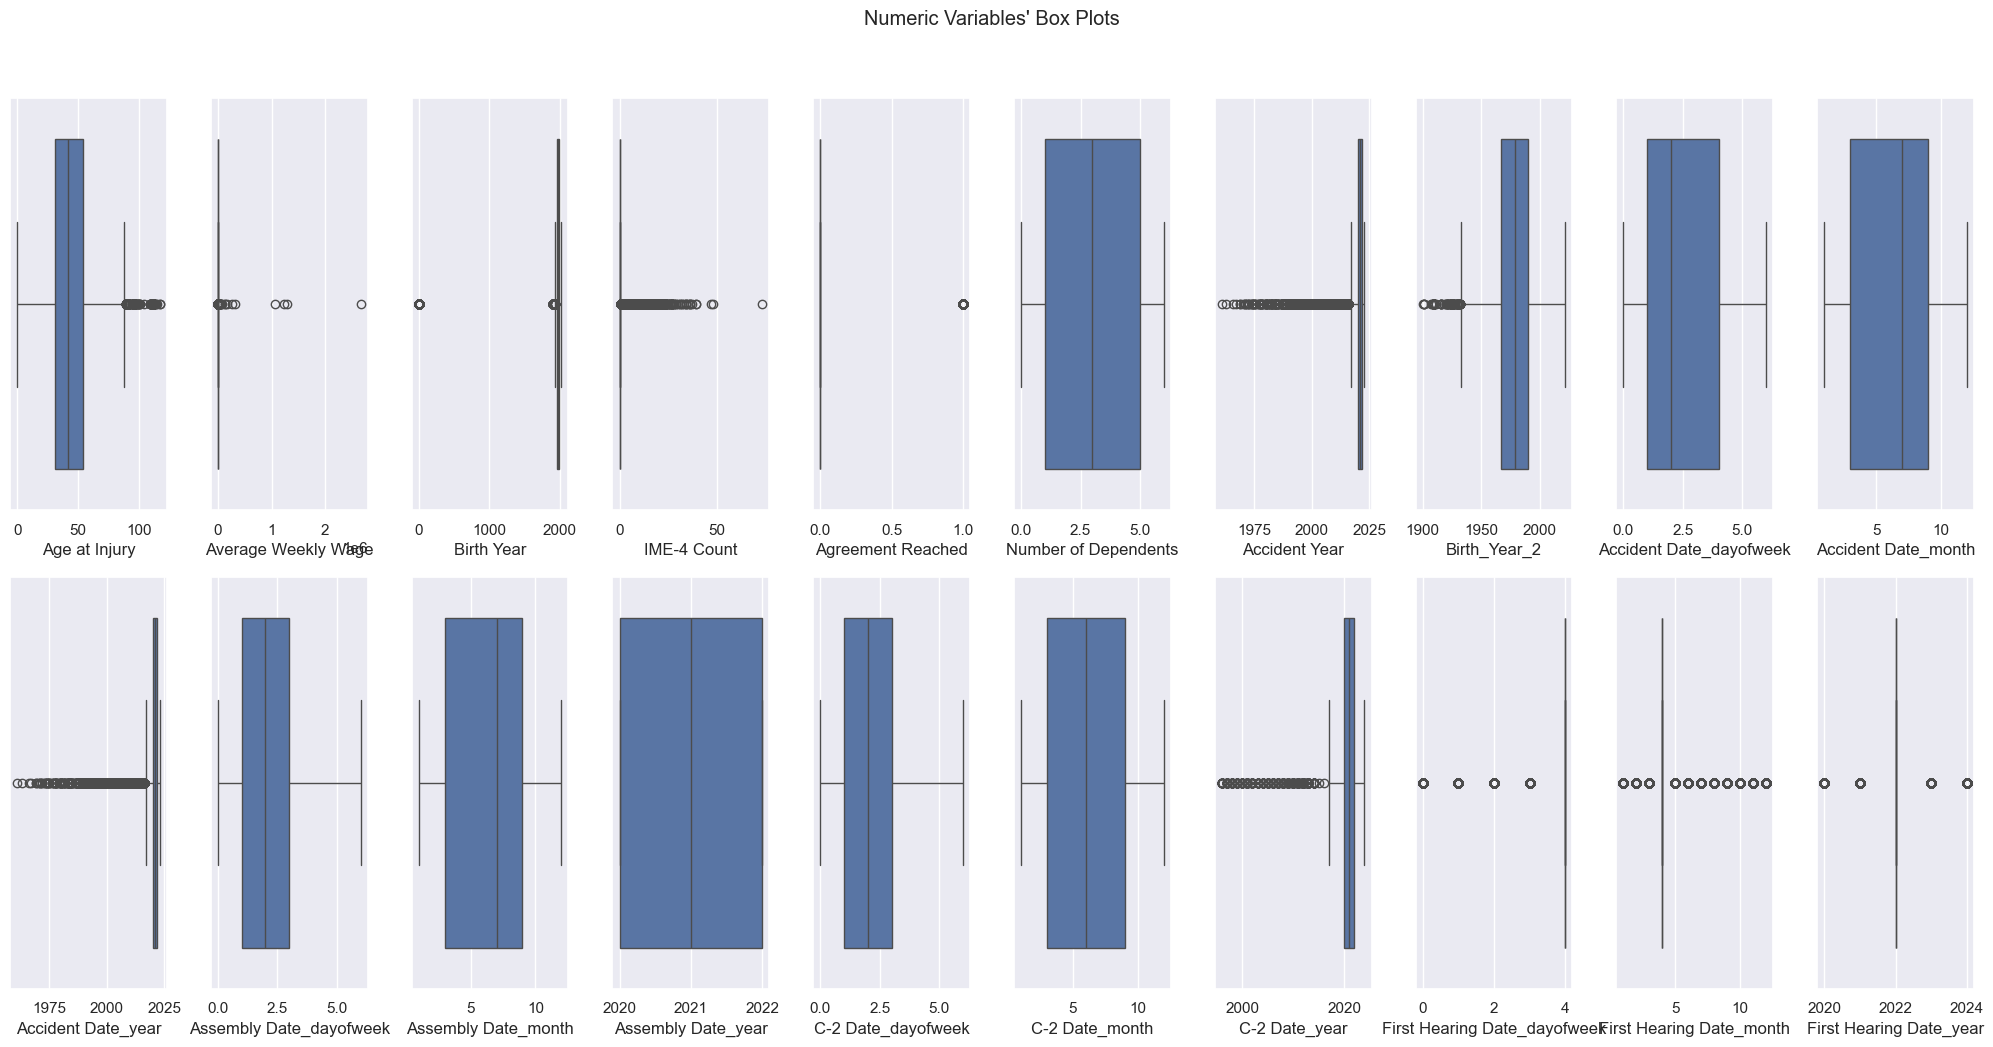

In [980]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train_num[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

Age at injury: all good

Average Weekly Wage: very strange

Birth Year: value 0 is a outlier, going to drop it

Agreement reach: just 0 or 1 values, no outliers

Number of dependents: all good

In [981]:
X_train_num.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)
X_val_num.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)
X_test_num.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)

o que fazer com o Bith Year = 0?

In [982]:
(X_train_num['Birth Year'] == 0).sum()

17512

In [983]:
not_voluntary_train = X_train_num[X_train_num['Average Weekly Wage'] != 0]
not_voluntary_val = X_val_num[X_val_num['Average Weekly Wage'] != 0]

1/3 are non-voluntary, so the majority is voluntary

Decided to consider outlier just the outliers of the non-voluntary workers, using the formula below

In [984]:
# Function to calculate IQR and identify outliers for a specific column
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Identify outliers for the 'Average Weekly Wage' column
outliers_train = identify_outliers_iqr_column(not_voluntary_train, 'Average Weekly Wage')
outliers_val = identify_outliers_iqr_column(not_voluntary_val, 'Average Weekly Wage')

# Align the index of the outliers Series with X_train_num
outliers_aligned_train = outliers_train.reindex(X_train_num.index, fill_value=False)
outliers_aligned_val = outliers_val.reindex(X_val_num.index, fill_value=False)

# Print the number of outliers in the 'Average Weekly Wage' column
print(f"Number of outliers in 'Average Weekly Wage': {outliers_train.sum()}")
print(f"Number of outliers in 'Average Weekly Wage': {outliers_val.sum()}")

# Remove outliers from the 'Average Weekly Wage' column
X_train_num_cleaned = X_train_num[~outliers_aligned_train]
X_train_cat_cleaned = X_train_cat[~outliers_aligned_train]
y_train = y_train[~outliers_aligned_train]
X_val_cat_cleaned = X_val_cat[~outliers_aligned_val]
X_val_num_cleaned = X_val_num[~outliers_aligned_val]
y_val = y_val[~outliers_aligned_val]

# Verify the cleaned DataFrame
print(X_train_num.shape)
print(X_train_num_cleaned.shape)
print(X_val_num.shape)
print(X_val_num_cleaned.shape)

Number of outliers in 'Average Weekly Wage': 4173
Number of outliers in 'Average Weekly Wage': 1840
(401817, 18)
(397644, 18)
(172208, 18)
(170368, 18)


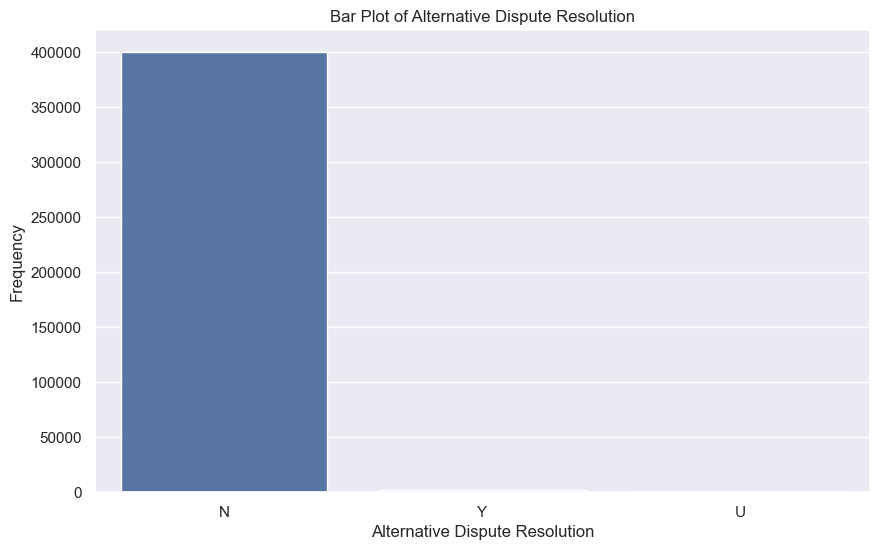

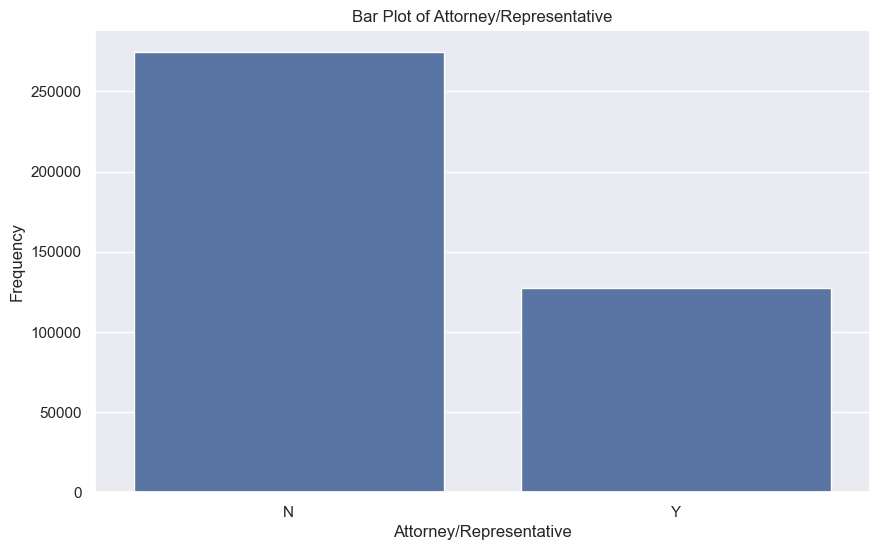

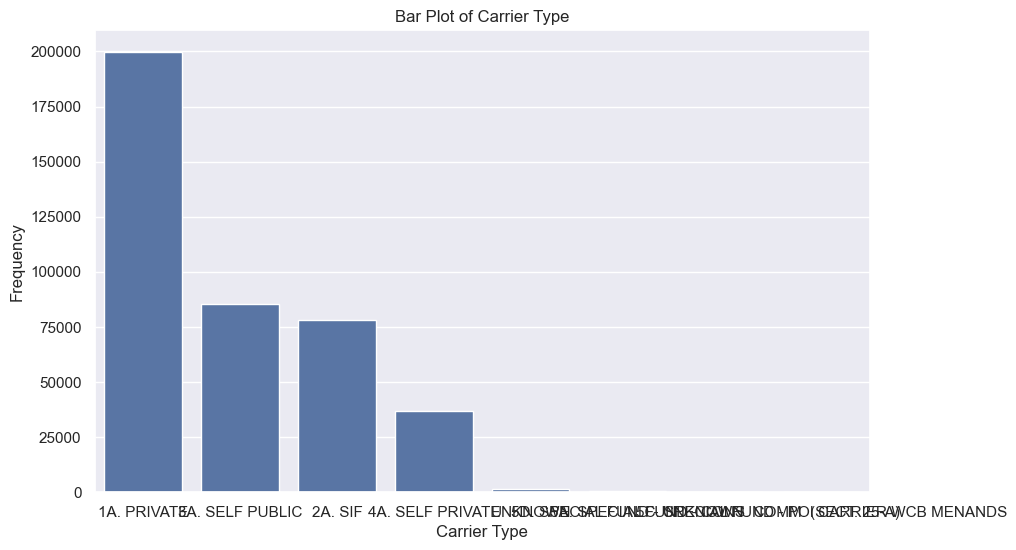

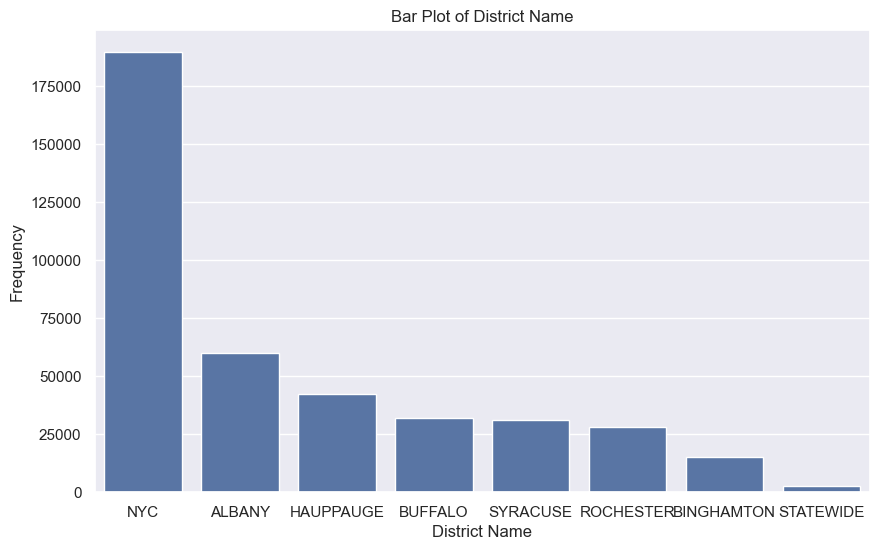

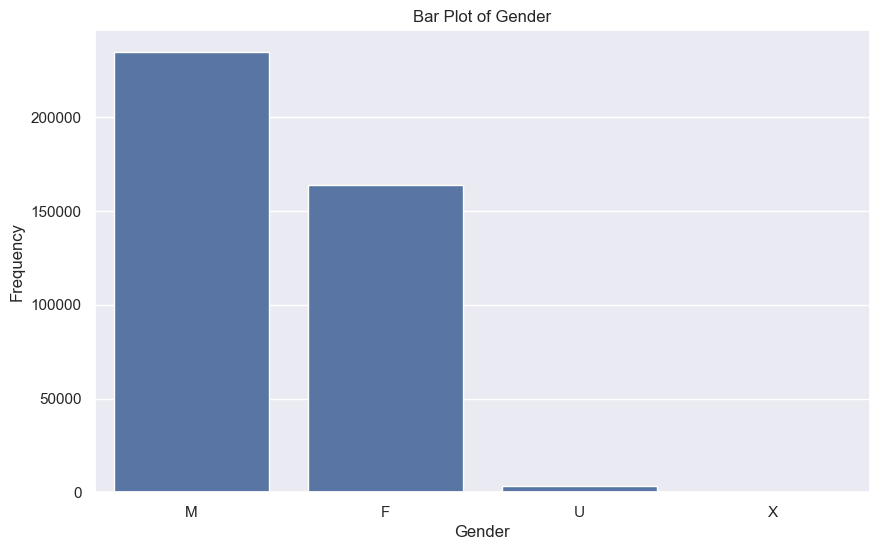

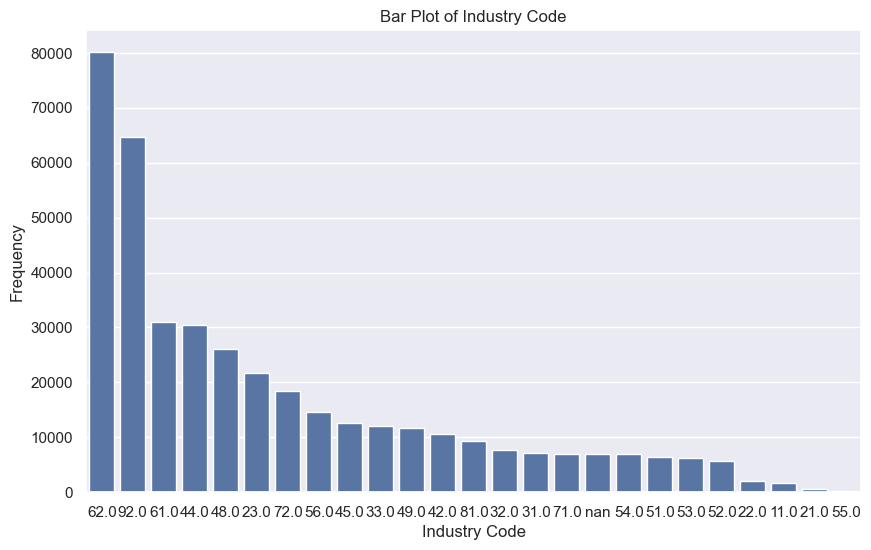

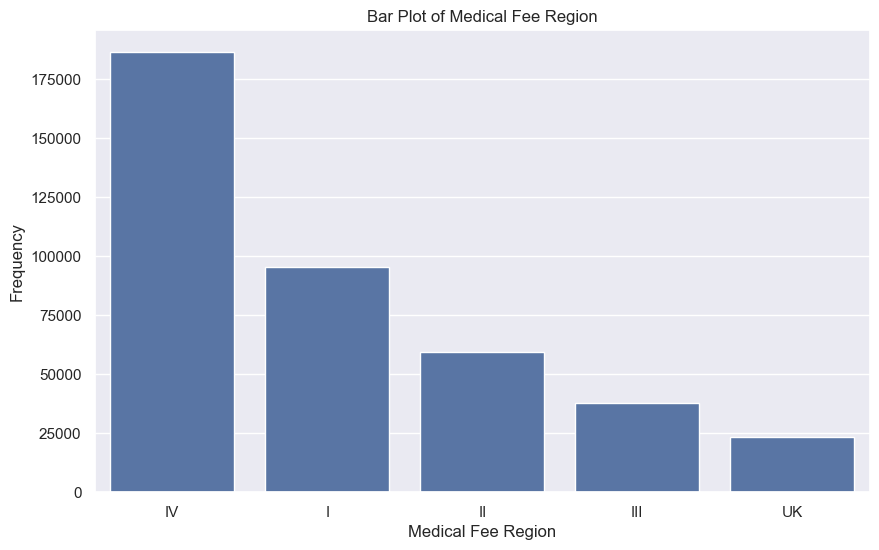

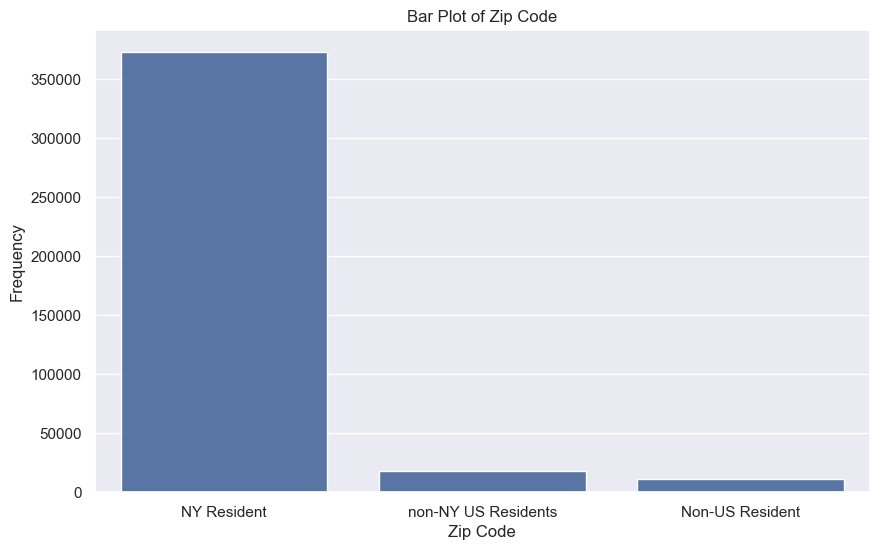

In [985]:
sns.set()
columns_to_plot = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'District Name', 'Gender', 'Industry Code', 'Medical Fee Region', 'Zip Code']

for i in columns_to_plot:
    if i in X_train_cat.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X_train_cat[i].value_counts().index, y=X_train_cat[i].value_counts().values)
        plt.title(f'Bar Plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{i}' does not exist in the DataFrame.")

#### Categorical Columns as Numerical

In [986]:
""" date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'] #'C-3 Date',

for col in date_cols:
    X_train_cat[col] = pd.to_datetime(X_train_cat[col], errors='coerce')
    X_val_cat[col] = pd.to_datetime(X_val_cat[col], errors='coerce')

# Extrair características das datas
for col in date_cols:
    X_train_cat[col + '_dayofweek'] = X_train_cat[col].dt.dayofweek
    X_train_cat[col + '_month'] = X_train_cat[col].dt.month
    X_train_cat[col + '_year'] = X_train_cat[col].dt.year
    
    X_val_cat[col + '_dayofweek'] = X_val_cat[col].dt.dayofweek
    X_val_cat[col + '_month'] = X_val_cat[col].dt.month
    X_val_cat[col + '_year'] = X_val_cat[col].dt.year

# Remover as colunas de data originais se não forem mais necessárias
X_train_cat.drop(columns=date_cols, inplace=True)
X_val_cat.drop(columns=date_cols, inplace=True) """

" date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'] #'C-3 Date',\n\nfor col in date_cols:\n    X_train_cat[col] = pd.to_datetime(X_train_cat[col], errors='coerce')\n    X_val_cat[col] = pd.to_datetime(X_val_cat[col], errors='coerce')\n\n# Extrair características das datas\nfor col in date_cols:\n    X_train_cat[col + '_dayofweek'] = X_train_cat[col].dt.dayofweek\n    X_train_cat[col + '_month'] = X_train_cat[col].dt.month\n    X_train_cat[col + '_year'] = X_train_cat[col].dt.year\n    \n    X_val_cat[col + '_dayofweek'] = X_val_cat[col].dt.dayofweek\n    X_val_cat[col + '_month'] = X_val_cat[col].dt.month\n    X_val_cat[col + '_year'] = X_val_cat[col].dt.year\n\n# Remover as colunas de data originais se não forem mais necessárias\nX_train_cat.drop(columns=date_cols, inplace=True)\nX_val_cat.drop(columns=date_cols, inplace=True) "

tirar a data

In [987]:
from sklearn.preprocessing import OrdinalEncoder

enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat = enc1.fit_transform(X_train_cat_cleaned)
X_val_cat = enc1.transform(X_val_cat_cleaned)
X_test_cat = enc1.transform(X_test_cat)
X_train_cat

array([[0.000e+00, 0.000e+00, 1.249e+03, ..., 5.300e+01, 2.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.967e+03, ..., 4.200e+01, 1.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.645e+03, ..., 8.000e+00, 4.100e+01,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.645e+03, ..., 2.100e+01, 5.300e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.956e+03, ..., 2.900e+01, 2.300e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.510e+02, ..., 4.300e+01, 1.300e+01,
        0.000e+00]])

In [988]:
enc2 = LabelEncoder() #encoder for labels
y_train = enc2.fit_transform(y_train)
y_val = enc2.transform(y_val)

In [989]:
""" X_train_cat_encoded = pd.DataFrame()
for col in X_train_cat.columns.tolist():
    X_train_cat_encoded[col] = X_train_cat[col].map({category: i+1 for i, category in enumerate(X_train_cat[col].unique())})
X_train_cat_encoded

X_val_cat_encoded = pd.DataFrame()
for col in X_val_cat.columns.tolist():
    X_val_cat_encoded[col] = X_val_cat[col].map({category: i+1 for i, category in enumerate(X_val_cat[col].unique())})
X_val_cat_encoded """

' X_train_cat_encoded = pd.DataFrame()\nfor col in X_train_cat.columns.tolist():\n    X_train_cat_encoded[col] = X_train_cat[col].map({category: i+1 for i, category in enumerate(X_train_cat[col].unique())})\nX_train_cat_encoded\n\nX_val_cat_encoded = pd.DataFrame()\nfor col in X_val_cat.columns.tolist():\n    X_val_cat_encoded[col] = X_val_cat[col].map({category: i+1 for i, category in enumerate(X_val_cat[col].unique())})\nX_val_cat_encoded '

### Scaling

In [ ]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num_cleaned)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=X_train_num_cleaned.columns)
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns)
X_train_num_scaled

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Agreement Reached


In [ ]:
X_val_num_scaled = scaler.transform(X_val_num_cleaned)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns=X_val_num_cleaned.columns)
X_val_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Agreement Reached,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
0,0.307692,0.0,0.981207,0.0,0.0,0.166667,0.500000,0.545455,0.951613,0.333333,0.545455,0.0,0.333333,0.545455,0.857143,1.00,0.272727,0.50
1,0.324786,0.0,0.980712,0.0,0.0,0.833333,0.666667,0.909091,0.983871,0.166667,0.909091,1.0,0.166667,0.909091,0.928571,1.00,0.272727,0.50
2,0.487179,0.0,0.000000,0.0,0.0,0.166667,0.333333,0.454545,0.967742,0.333333,0.454545,0.5,0.166667,0.454545,0.892857,1.00,0.272727,0.50
3,0.316239,0.0,0.981207,0.0,0.0,0.500000,0.500000,0.454545,0.983871,0.000000,0.727273,1.0,0.666667,0.727273,0.928571,1.00,0.272727,0.50
4,0.179487,0.0,0.989120,0.0,0.0,0.166667,0.166667,0.727273,0.983871,0.000000,0.727273,1.0,0.000000,0.727273,0.928571,1.00,0.272727,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170363,0.316239,0.0,0.981207,0.0,0.0,1.000000,0.833333,0.181818,0.967742,0.500000,0.181818,0.5,0.500000,0.181818,0.892857,1.00,0.272727,0.50
170364,0.572650,0.0,0.966370,0.0,0.0,1.000000,0.000000,0.000000,0.967742,0.166667,0.000000,0.5,0.166667,0.000000,0.892857,0.75,0.181818,0.25
170365,0.529915,0.0,0.968348,0.0,0.0,1.000000,0.666667,0.181818,0.951613,0.000000,0.636364,0.0,0.500000,0.636364,0.857143,1.00,0.272727,0.50
170366,0.316239,0.0,0.980218,0.0,0.0,0.666667,0.166667,0.909091,0.935484,0.333333,0.000000,0.0,0.333333,0.000000,0.857143,1.00,0.272727,0.50


# Feature selection

In [ ]:
X_train_num_scaled.var()

Age at Injury                   0.014902
Average Weekly Wage             0.051066
Birth Year                      0.039872
IME-4 Count                     0.000688
Agreement Reached               0.044920
Number of Dependents            0.111324
Accident Date_dayofweek         0.093156
Accident Date_month             0.099259
Accident Date_year              0.000898
Assembly Date_dayofweek         0.057377
Assembly Date_month             0.097978
Assembly Date_year              0.164224
C-2 Date_dayofweek              0.059543
C-2 Date_month                  0.096077
C-2 Date_year                   0.001460
First Hearing Date_dayofweek    0.081446
First Hearing Date_month        0.036034
First Hearing Date_year         0.019173
dtype: float64

In [ ]:
#X_train_scaled.drop('Average Weekly Wage', axis=1, inplace=True)
#X_val_scaled.drop('Average Weekly Wage', axis=1, inplace=True)

X_train_num_scaled.drop('IME-4 Count', axis=1, inplace=True)
X_val_num_scaled.drop('IME-4 Count', axis=1, inplace=True)
X_test_num_scaled.drop('IME-4 Count', axis=1, inplace=True)

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [ ]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman #Age at Injury and Birth Year are highly correlated, what make a lot of sense, it is the same information, we should delete one of them (Birth Year)

,Age at Injury,Average Weekly Wage,Birth Year,Agreement Reached,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Age at Injury,1.000000,0.117916,-0.877473,0.020526,0.000050,-6.022794e-02,-0.008554,-0.002526,0.005538,-0.014544,-0.010545,0.008474,-1.113077e-02,-0.014111,-0.094513,0.047409,-0.020827
Average Weekly Wage,0.117916,1.000000,-0.084637,0.105139,-0.000423,-1.036771e-02,-0.008064,-0.008155,0.002637,-0.009578,-0.036173,0.022062,-2.920203e-03,-0.017087,-0.422969,0.191099,-0.068990
Birth Year,-0.877473,-0.084637,1.000000,-0.052061,-0.000886,3.132952e-02,0.043075,0.098690,-0.004650,0.050770,0.068917,0.003499,5.052274e-02,0.071321,0.089469,-0.047140,0.046086
Agreement Reached,0.020526,0.105139,-0.052061,1.000000,0.000126,3.552268e-03,-0.013095,-0.101069,0.001017,-0.022290,-0.072112,0.005877,-1.818748e-02,-0.081901,-0.217275,0.105547,-0.162314
Number of Dependents,0.000050,-0.000423,-0.000886,0.000126,1.000000,1.350316e-03,-0.000855,0.002106,-0.003125,-0.000401,0.002214,0.000102,-6.796222e-05,0.001810,0.001985,0.001412,0.001486
Accident Date_dayofweek,-0.060228,-0.010368,0.031330,0.003552,0.001350,1.000000e+00,-0.019371,-0.021645,-0.039635,0.001093,-0.011056,-0.052877,7.343775e-07,-0.007848,-0.007031,0.004460,-0.006685
Accident Date_month,-0.008554,-0.008064,0.043075,-0.013095,-0.000855,-1.937065e-02,1.000000,-0.061666,-0.017505,0.689770,0.012636,-0.008512,6.646346e-01,0.017225,0.010510,-0.075867,0.085225
Accident Date_year,-0.002526,-0.008155,0.098690,-0.101069,0.002106,-2.164461e-02,-0.061666,1.000000,-0.005242,0.095246,0.925195,0.016935,9.884408e-02,0.908850,0.055764,-0.031803,0.358266
Assembly Date_dayofweek,0.005538,0.002637,-0.004650,0.001017,-0.003125,-3.963532e-02,-0.017505,-0.005242,1.000000,-0.020587,-0.004704,0.624994,-1.766838e-02,-0.004923,-0.004959,0.002539,-0.001805
Assembly Date_month,-0.014544,-0.009578,0.050770,-0.022290,-0.000401,1.093119e-03,0.689770,0.095246,-0.020587,1.000000,0.011200,-0.010141,9.280366e-01,0.028177,0.008169,-0.077429,0.117610


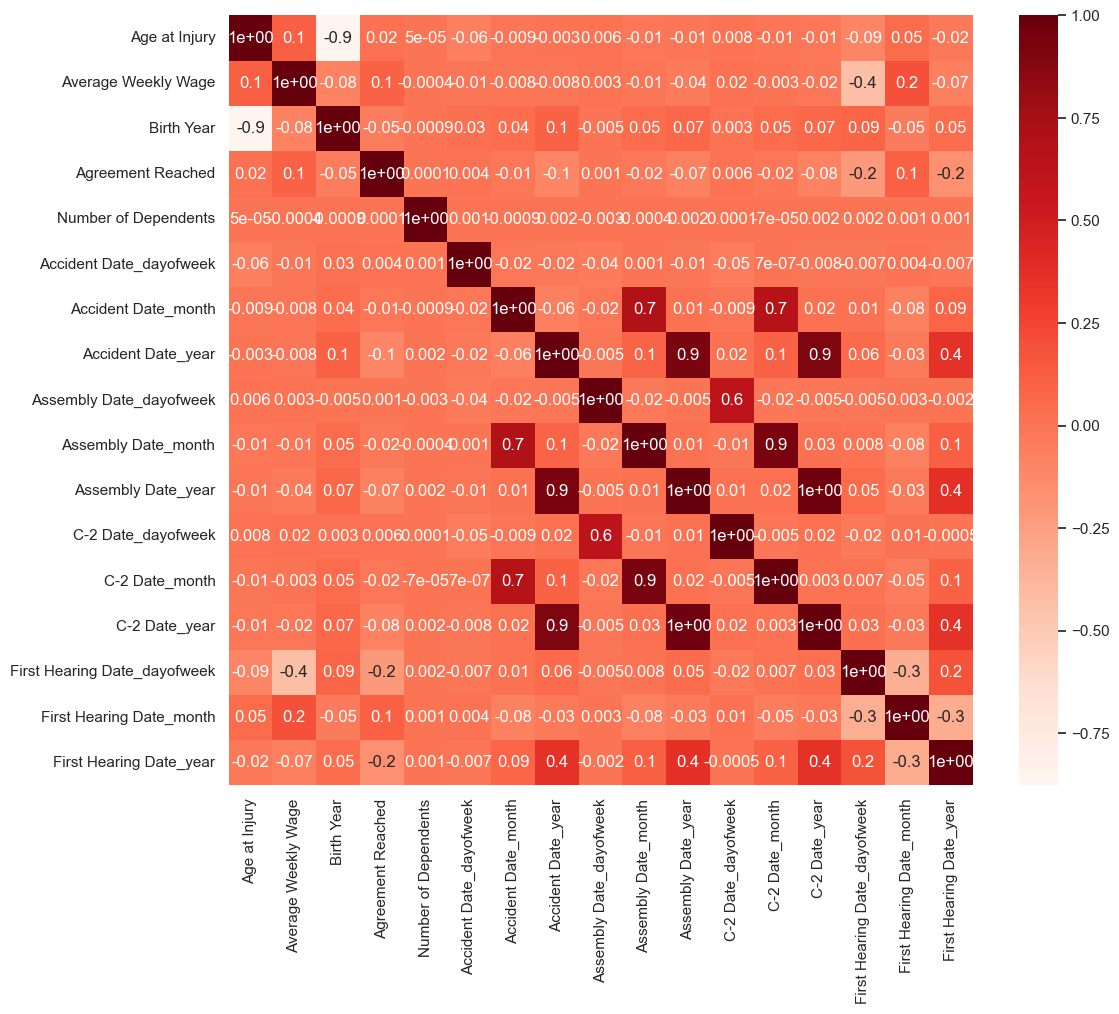

In [ ]:
cor_heatmap(cor_spearman)

In [ ]:
X_train_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_val_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_test_num_scaled.drop('Birth Year', axis=1, inplace=True)

In [ ]:
X_train_cat_df = pd.DataFrame(X_train_cat, columns=X_train_cat_cleaned.columns, index=X_train_num_scaled.index)
X_val_cat_df = pd.DataFrame(X_val_cat, columns=X_val_cat_cleaned.columns, index=X_val_num_scaled.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=X_test_cat.columns, index=X_test_num_scaled.index)
X_train_cat.shape, X_train_num_scaled.shape

((397644, 18), (397644, 16))

In [ ]:
X_train_combined = pd.concat([X_train_num_scaled, X_train_cat_df], axis=1)
X_val_combined = pd.concat([X_val_num_scaled, X_val_cat_df], axis=1)
X_test_combined = pd.concat([X_test_num_scaled, X_test_cat_df], axis=1)

In [ ]:
X_train_combined.shape

(397644, 34)

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
for var in X_train_cat_df:
    TestIndependence(X_train_cat_df[var],y_train, var)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
Carrier Name is IMPORTANT for Prediction
Carrier Type is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Industry Code is IMPORTANT for Prediction
Industry Code Description is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
WCIO Cause of Injury Code is IMPORTANT for Prediction
WCIO Cause of Injury Description is IMPORTANT for Prediction
WCIO Nature of Injury Code is IMPORTANT for Prediction
WCIO Nature of Injury Description is IMPORTANT for Prediction
WCIO Part Of Body Code is IMPORTANT for Prediction
WCIO Part Of Body Description is IMPORTANT for Prediction
Zip Code is IMPORTANT for Prediction


In [ ]:
""" # first join all the training data
all_train = X_train.join(y_train)


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "Gender", "Claim Injury Type") """

' # first join all the training data\nall_train = X_train.join(y_train)\n\n\ndef bar_charts_categorical(df, feature, target):\n    cont_tab = pd.crosstab(df[feature], df[target], margins = True)\n    categories = cont_tab.index[:-1]\n        \n    fig = plt.figure(figsize=(15, 5))\n    \n    plt.subplot(121)\n    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")\n    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")\n    plt.legend((p2[0], p1[0]), (\'$y_i=1$\', \'$y_i=0$\'))\n    plt.title("Frequency bar chart")\n    plt.xlabel(feature)\n    plt.ylabel("$Frequency$")\n\n    # auxiliary data for 122\n    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), \n                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])\n      \n    plt.subplot(122)\n    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")\n    p2 = plt.bar(cat

In [ ]:
""" def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]

    fig = plt.figure(figsize=(15, 5))

    plt.subplot(121)
    colors = ["#FCF596", "#FBD288", "#FF9C73", "#FF4545", "#FF8C00", "#FF69B4", "#FFA07A", "#FFC080"]  
    cont_tab_sorted = cont_tab.iloc[:-1, :-1].sort_values(by=[cont_tab.columns[0], cont_tab.columns[1], cont_tab.columns[2], cont_tab.columns[3], cont_tab.columns[4], cont_tab.columns[5], cont_tab.columns[6], cont_tab.columns[7]])
    p = []
    for i in range(8):
        p.append(plt.bar(categories, cont_tab_sorted.iloc[:, i].values, 0.55, bottom=[sum(cont_tab_sorted.iloc[j, :i].values) for j in range(len(categories))], color=colors[i]))
    plt.legend([p[i][0] for i in range(8)], [cont_tab.columns[i] for i in range(8)])
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    plt.subplot(122)
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, i].values, cont_tab.iloc[:-1, 7].values) for i in range(8)])
    obs_pct_sorted = obs_pct[:, np.argsort(obs_pct[0])]
    for i in range(8):
        plt.bar(categories, obs_pct_sorted[i], 0.55, bottom=[sum(obs_pct_sorted[:i, j]) for j in range(len(categories))], color=colors[i])
    plt.legend([cont_tab.columns[i] for i in range(8)])
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

bar_charts_categorical(all_categorical, "Gender", "Claim Injury Type Num") """

' def bar_charts_categorical(df, feature, target):\n    cont_tab = pd.crosstab(df[feature], df[target], margins=True)\n    categories = cont_tab.index[:-1]\n\n    fig = plt.figure(figsize=(15, 5))\n\n    plt.subplot(121)\n    colors = ["#FCF596", "#FBD288", "#FF9C73", "#FF4545", "#FF8C00", "#FF69B4", "#FFA07A", "#FFC080"]  \n    cont_tab_sorted = cont_tab.iloc[:-1, :-1].sort_values(by=[cont_tab.columns[0], cont_tab.columns[1], cont_tab.columns[2], cont_tab.columns[3], cont_tab.columns[4], cont_tab.columns[5], cont_tab.columns[6], cont_tab.columns[7]])\n    p = []\n    for i in range(8):\n        p.append(plt.bar(categories, cont_tab_sorted.iloc[:, i].values, 0.55, bottom=[sum(cont_tab_sorted.iloc[j, :i].values) for j in range(len(categories))], color=colors[i]))\n    plt.legend([p[i][0] for i in range(8)], [cont_tab.columns[i] for i in range(8)])\n    plt.title("Frequency bar chart")\n    plt.xlabel(feature)\n    plt.ylabel("$Frequency$")\n\n    plt.subplot(122)\n    obs_pct = np.array

In [ ]:
X_train_num_scaled.shape, X_train_cat_df.shape

((397644, 16), (397644, 18))

In [ ]:
X_train_combined.shape

(397644, 34)

In [ ]:
aaaaaaaaaaaaaaaaaa

In [ ]:
#no of features
nof_list=np.arange(1,35)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(max_iter=1000)
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_combined,y_train)
    X_val_rfe = rfe.transform(X_val_combined)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

KeyboardInterrupt: 

In [ ]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator = model, n_features_to_select = 3)
X_rfe = rfe.fit_transform(X = X_train_scaled, y = y_train)
X_train_scaled.columns

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
rfe.support_

array([ True,  True,  True, False])

In [ ]:
rfe.ranking_

array([1, 1, 1, 2])

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_scaled.columns)
selected_features

Age at Injury            True
IME-4 Count              True
Agreement Reached        True
Number of Dependents    False
dtype: bool

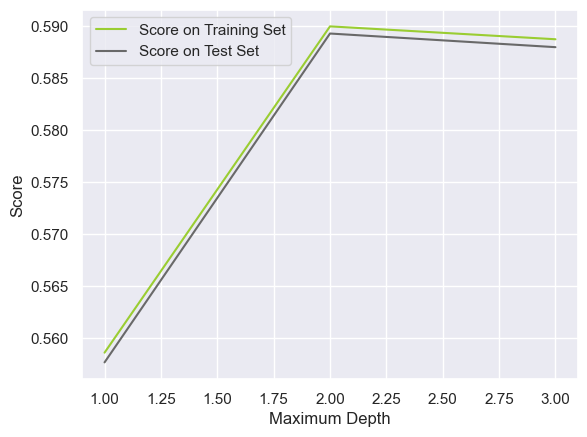

In [ ]:
plt.plot(list(range(1,4)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,4)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
X_train_combined.shape

(397644, 34)

In [ ]:
#no of features
nof_list=np.arange(1,35)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_combined,y_train)
    X_val_rfe = rfe.transform(X_val_combined)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_combined.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
plt.plot(list(range(1,4)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,4)), val_score_list, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

' plt.plot(list(range(1,4)), train_score_list, label="Score on Training Set", color=\'yellowgreen\')\nplt.plot(list(range(1,4)), val_score_list, label="Score on Test Set", color=\'dimgray\')\nplt.xlabel("Maximum Depth")\nplt.ylabel("Score")\nplt.legend()\nplt.show() '

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()
reg.fit(X_train_combined, y_train)
coef = pd.Series(reg.coef_, index = X_train_combined.columns)
coef

ValueError: could not convert string to float: '2. NON-COMP'

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

' print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables") '

In [ ]:
coef.sort_values()

' coef.sort_values() '

In [ ]:
plot_importance(coef,'Lasso')

" plot_importance(coef,'Lasso') "

# Build a simple model and assess the performance

In [ ]:
dt = DecisionTreeClassifier().fit(X_train_combined, y_train)
preds_train = dt.predict(X_train_combined)
preds_val = dt.predict(X_val_combined)

In [ ]:
print(dt.score(X_train_combined, y_train))
print(dt.score(X_val_combined, y_val))

0.9999974851877559
0.686836729902329


In [ ]:
print(confusion_matrix(y_train, preds_train))
print(confusion_matrix(y_val, preds_val))

[[  8732      0      0      0      0      0      0      0]
 [     1 203741      0      0      0      0      0      0]
 [     0      0  47595      0      0      0      0      0]
 [     0      0      0 101720      0      0      0      0]
 [     0      0      0      0  32587      0      0      0]
 [     0      0      0      0      0   2884      0      0]
 [     0      0      0      0      0      0     64      0]
 [     0      0      0      0      0      0      0    320]]
[[ 1606  1719   279    96    40     3     0     0]
 [ 1851 72746 10815  1485   375    28     0    20]
 [  287  8873  4723  5000  1343   160     2    19]
 [   91  1165  5921 30545  4884   856    15    90]
 [   44   274  1522  4528  7281   271     4     7]
 [    5    16   151   693   257   105     2     4]
 [    1     1     6    15     3     2     0     0]
 [    5    20    28    66     6     5     0     9]]


In [ ]:
%pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

def train_model(X_train, y_train, model_type='xgb', random_state=42):
    """Train model with multiple options"""
    print(f"\nTraining {model_type} model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    if model_type == 'xgb':
        model = XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=random_state,
            n_jobs=2,
            tree_method='hist',
            enable_categorical=True,
            objective='multi:softprob',
            num_class=8,
            eval_metric=['mlogloss', 'merror'],
            use_label_encoder=False
        )
        
        # Train with early stopping
        eval_set = [(X_train, y_train)]
        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=True
        )
        
    elif model_type == 'hist_gb':
        model = HistGradientBoostingClassifier(
            max_iter=100,
            learning_rate=0.1,
            max_depth=None,
            random_state=random_state,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    elif model_type == 'simple_rf':
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=random_state,
            n_jobs=2,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    return model

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.3/124.9 MB 3.5 MB/s eta 0:00:36
    --------------------------------------- 2.1/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 2.9/124.9 MB 3.6 MB/s eta 0:00:35
   - -------------------------------------- 3.7/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 4.5/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 5.2/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 6.0/124.9 MB 3.5 MB/s eta 0:00:34
   -- ------------------------------------- 6.8/124.9 MB 3.6 MB/s eta 0:00:34
   -- ------------------------------------- 7.6/124.9 MB 3.6 MB/s eta 0:00:33
   -- ------------------------------------- 8.4/124.9 MB 3.6 MB/s eta 0:00:33
   -- ------------------------------------- 9.2/124.9 MB 3.6 MB/s eta 0

In [ ]:
model = train_model(X_train_combined, y_train)


Training xgb model...
Starting training with 34 features...


c:\Users\lopes\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:04:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.83642	validation_0-merror:0.21670
[1]	validation_0-mlogloss:1.66318	validation_0-merror:0.21648
[2]	validation_0-mlogloss:1.52808	validation_0-merror:0.21552
[3]	validation_0-mlogloss:1.41813	validation_0-merror:0.21555
[4]	validation_0-mlogloss:1.32643	validation_0-merror:0.21463
[5]	validation_0-mlogloss:1.24848	validation_0-merror:0.21442
[6]	validation_0-mlogloss:1.18101	validation_0-merror:0.21414
[7]	validation_0-mlogloss:1.12225	validation_0-merror:0.21395
[8]	validation_0-mlogloss:1.07096	validation_0-merror:0.21392
[9]	validation_0-mlogloss:1.02559	validation_0-merror:0.21379
[10]	validation_0-mlogloss:0.98411	validation_0-merror:0.21272
[11]	validation_0-mlogloss:0.94829	validation_0-merror:0.21298
[12]	validation_0-mlogloss:0.91618	validation_0-merror:0.21239
[13]	validation_0-mlogloss:0.88696	validation_0-merror:0.21105
[14]	validation_0-mlogloss:0.86100	validation_0-merror:0.21072
[15]	validation_0-mlogloss:0.83784	validation_0-merror:0.21042
[1

In [ ]:
print(model.score(X_train_combined, y_train))
print(model.score(X_val_combined, y_val))

0.8027808793795456
0.7987415477084898


In [ ]:
test_data['Claim Injury Type'] = dt.predict(test_data)
test_data

#export test data predictions
test_data['Claim Injury Type'].to_csv('Exercise1_predictions.csv')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Accident Date
- Assembly Date
- Birth Year
- C-2 Date
- C-3 Date
- ...
Feature names seen at fit time, yet now missing:
- Accident Date_dayofweek
- Accident Date_month
- Accident Date_year
- Agreement Reached
- Assembly Date_dayofweek
- ...
